<a href="https://colab.research.google.com/github/tingcodingwinner/stock1/blob/main/00737google%20trends%20plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

File NotoSansTC-Regular.otf already exists. Skip downloading.
Folder repo already exists. Skip cloning.


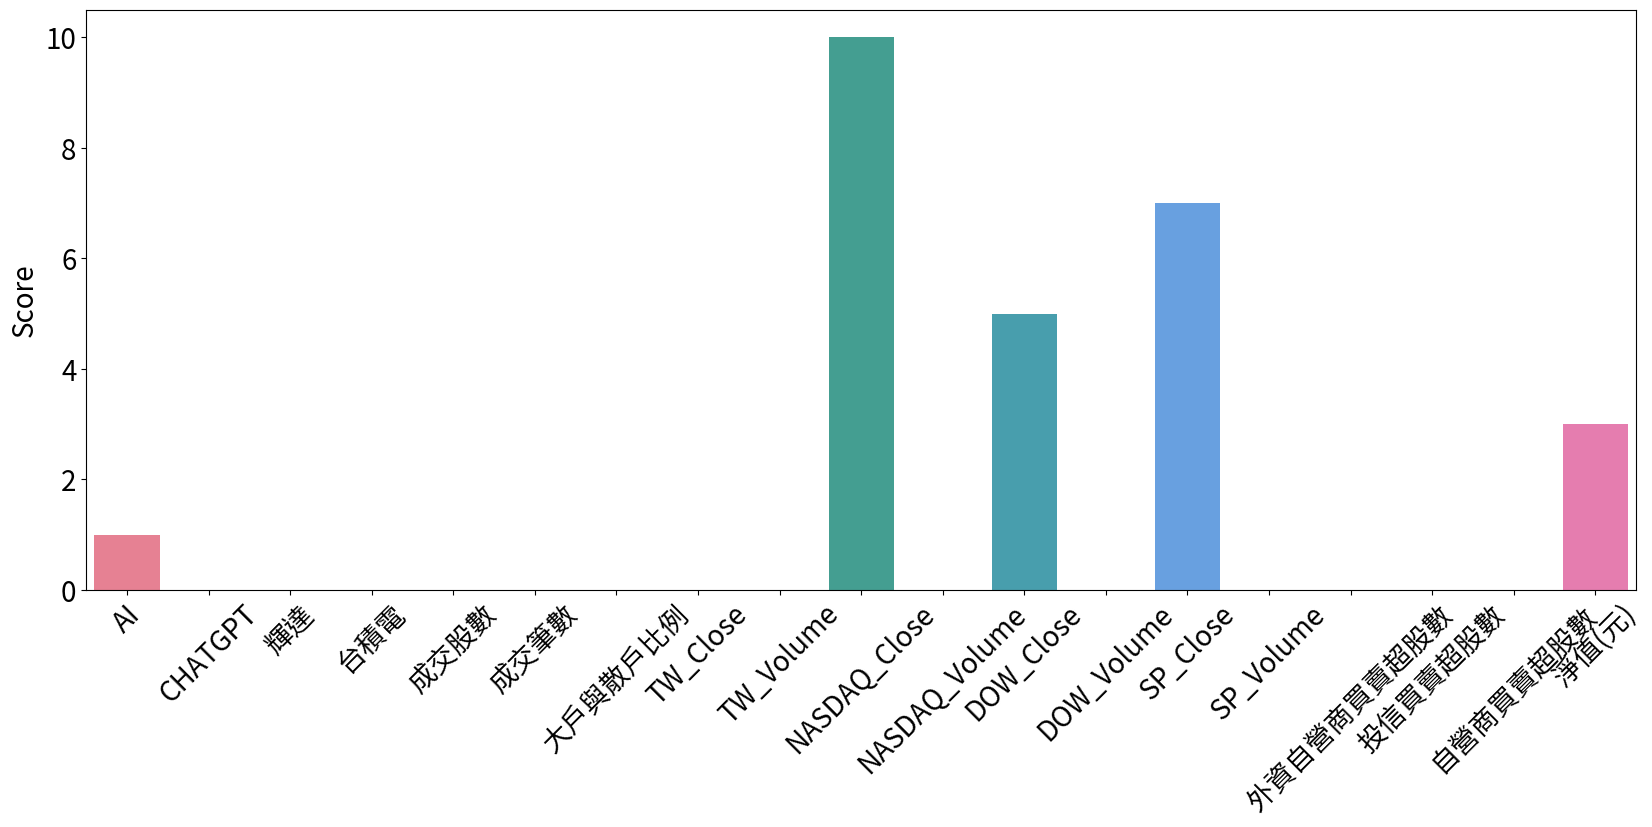

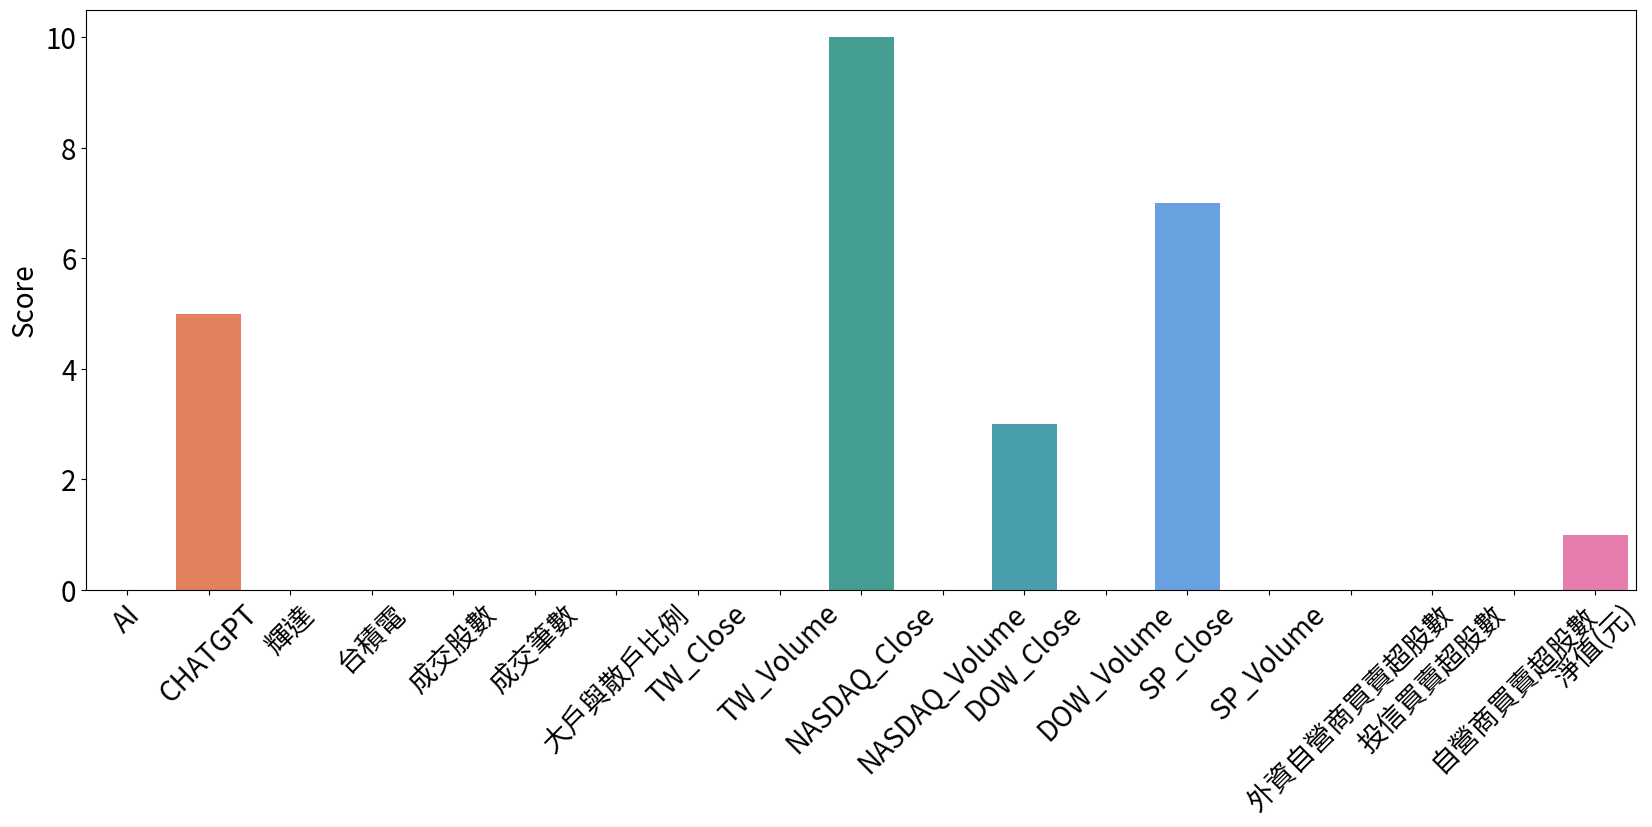

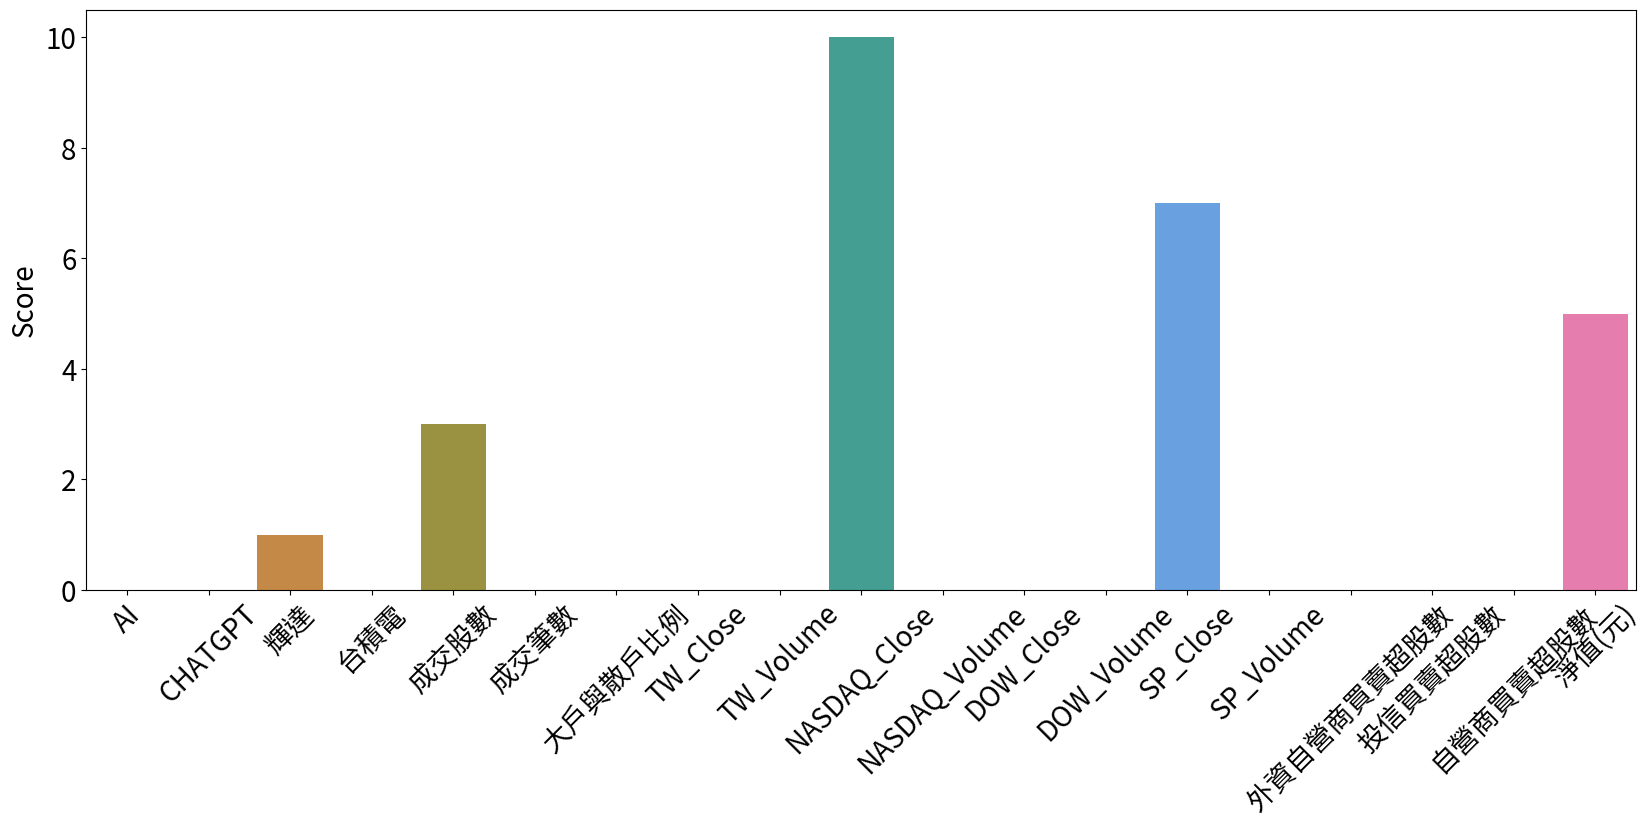

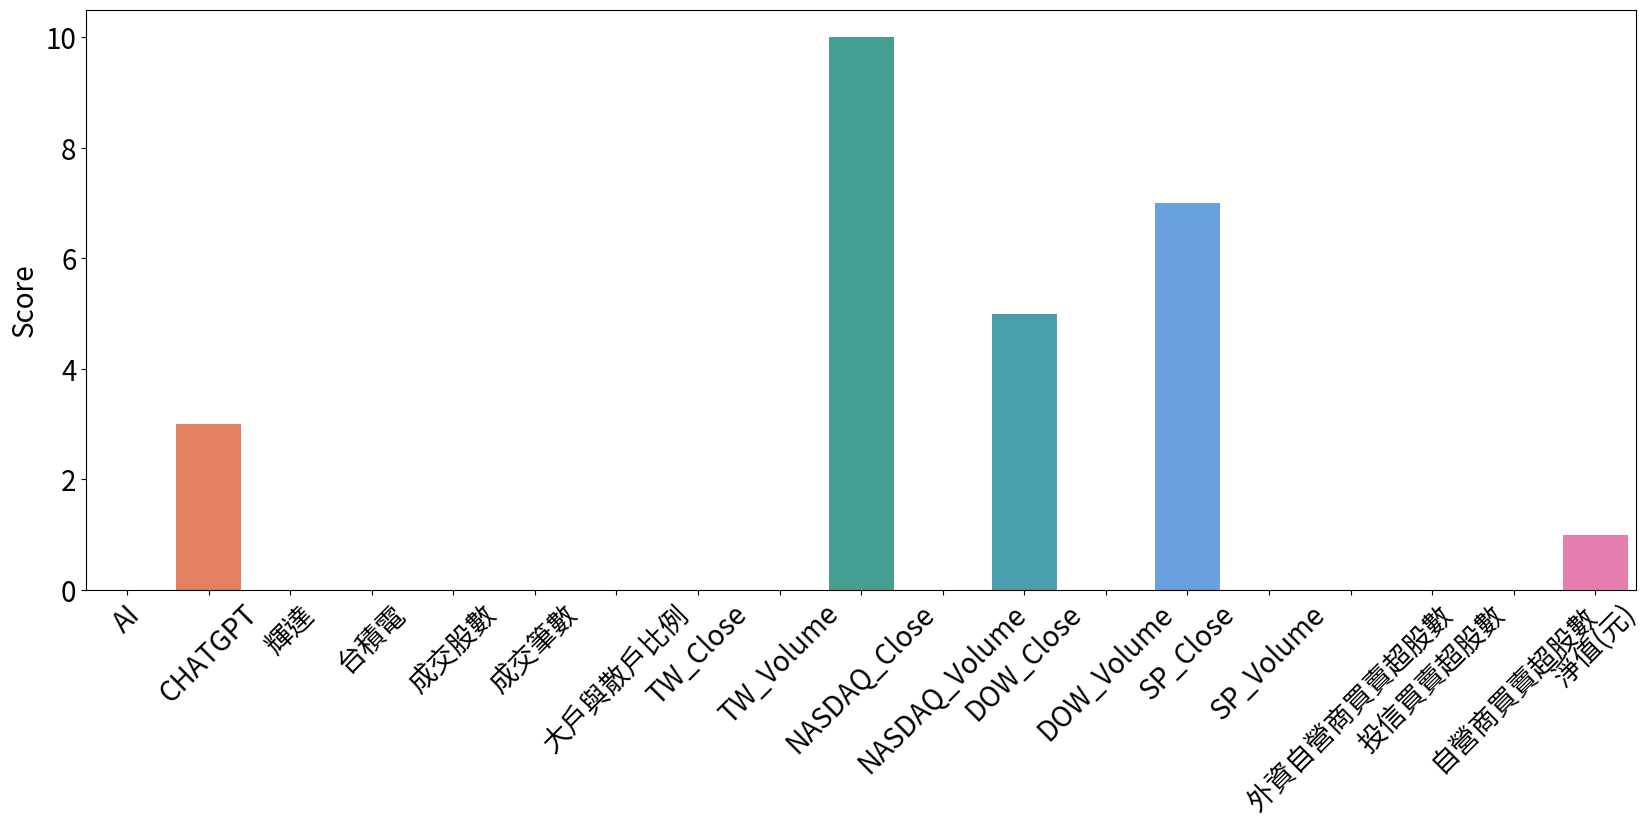

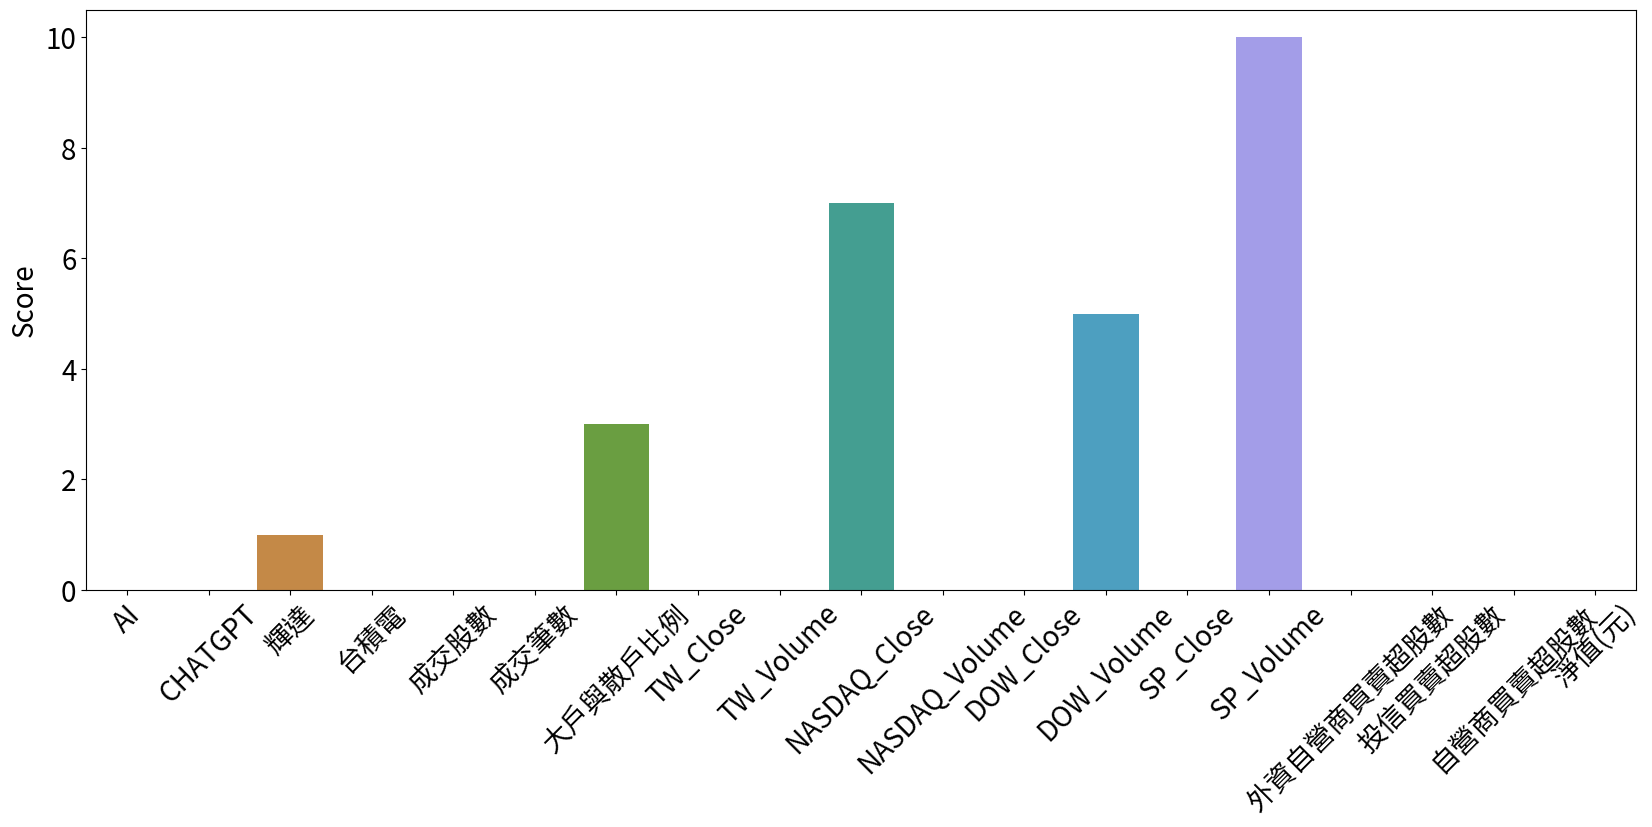

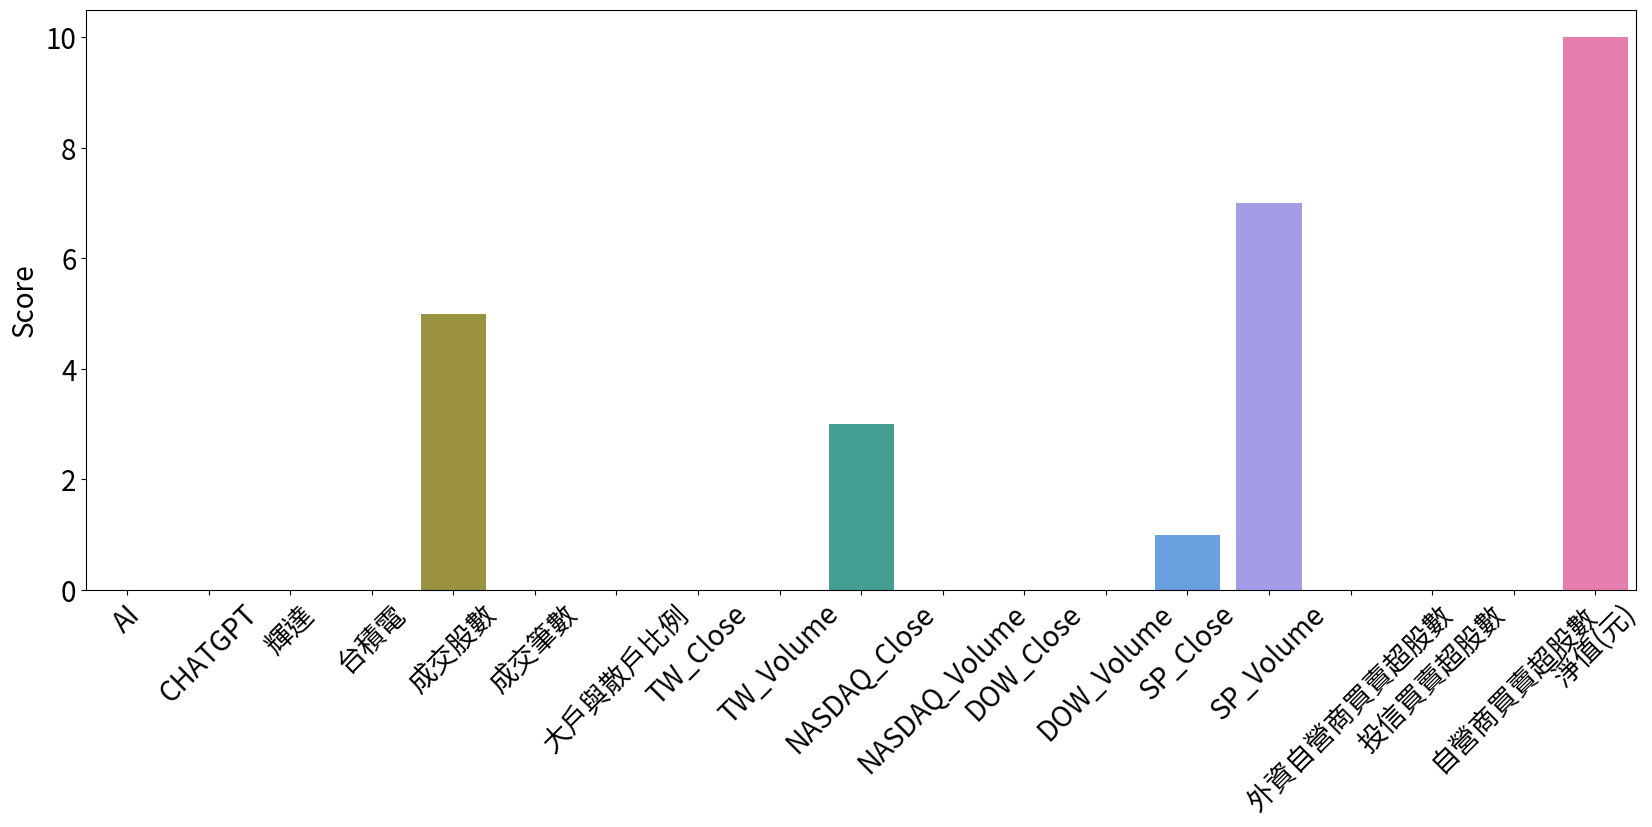

In [ ]:
#!/usr/bin/env python
# Ensure gitpython is installed:
!pip install gitpython

import glob
import pandas as pd
import os
import seaborn as sns
import matplotlib as mpl
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
import requests
import git  # Import git for cloning repositories

class ploter:

    def __init__(self, folderRegex = '分析結果/*corr.csv', saveFolder='分析結果'):
        # Initialize plotter with folder regex and save folder path
        self.folderRegex = folderRegex
        self.saveFolder = saveFolder

    def glob(self, folderRegex):
        # Use glob to find files matching the regex pattern
        files = glob.glob(folderRegex, recursive=True)
        return files

    def run(self):
        # Main method to process each file found by glob
        for path in self.glob(self.folderRegex):
            df = pd.read_csv(path)  # Read CSV file into DataFrame
            # Generate save path for the plot
            savePath = os.path.join(self.saveFolder, os.path.basename(path).replace('.csv', '.png'))
            self.plot(df, savePath)  # Plot the DataFrame

    def plot(self, df, savePath, topKScore=(10, 7, 5, 3, 1)):
        # Plotting logic including calculation of total correlation and sorting
        corr = df.values
        shape = corr.shape
        totalCorr = np.sum(corr, axis=0)
        argsort = np.argsort(-totalCorr)
        actualScore = np.zeros((1, shape[1]))
        nTopK = len(topKScore)
        actualScore[0, argsort[:nTopK]] = topKScore

        df4Plot = pd.DataFrame(data=actualScore, columns=df.columns)
        plt.figure(figsize=(20, 10))  # Set figure size
        plt.subplots_adjust(bottom=0.3)  # Adjust bottom margin
        sns.barplot(data=df4Plot)  # Create bar plot
        plt.xticks(rotation=45)  # Rotate x-axis labels
        plt.ylabel('Score')  # Set y-axis label

        plt.savefig(savePath)  # Save the plot
        plt.show()  # Display the plot
        plt.close()  # Close the plot to free up memory

    @staticmethod
    def downloadFile(url, save_path):
        # Static method to download a file if it doesn't already exist
        if os.path.exists(save_path):
            print(f"File {save_path} already exists. Skip downloading.")
            return
        r = requests.get(url)
        if r.status_code == 200:
            with open(save_path, "wb") as f:
                f.write(r.content)
        else:
            raise ValueError(f"Failed to download file from {url}. Status code: {r.status_code}")

    def git(self, repoUrl='https://github.com/leolo803/ccClub2024.git', savePath='repo'):
        # Method to clone a git repository if the save path doesn't already exist
        if os.path.exists(savePath):
            print(f"Folder {savePath} already exists. Skip cloning.")
            return
        git.Repo.clone_from(repoUrl, savePath)

if __name__ == "__main__":
    # Download font file and set it for seaborn and matplotlib
    fontUrl = 'https://raw.githubusercontent.com/kartotherian/osm-bright.fonts/master/fonts/NotoSansTC-Regular.otf'
    fontPath = 'NotoSansTC-Regular.otf'
    ploter.downloadFile(fontUrl, fontPath)

    mpl.font_manager.fontManager.addfont(fontPath)
    mpl.rcParams['font.family'] = 'Noto Sans TC'
    mpl.rcParams['font.size'] = 20

    # Initialize plotter with specific folder regex and save folder
    folderRegex = 'repo/00737/分析結果/*corr.csv'
    saveFolder = 'repo/00737/分析結果'
    p = ploter(folderRegex, saveFolder)
    p.git()  # Clone the repository
    p.run()  # Run the plotting process